In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path="C:\\Users\\Vamsi\\OneDrive\\Desktop\\EDA\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
visa_df['continent'].value_counts()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

In [4]:
visa_df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

In [5]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con=con1&con2
len(visa_df[con])

11012

In [6]:
# Generalised
lables=visa_df['continent'].unique()
certified_count=[]
denied_count=[]
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certified_count.append(len(visa_df[con1&con2]))
    denied_count.append(len(visa_df[con1&con3]))

pd.DataFrame(zip(lables,certified_count,denied_count),
columns=['continent','certified','denied'])

,continent,certified,denied
0,Asia,11012,5849
1,Africa,397,154
2,North America,2037,1255
3,Europe,2957,775
4,South America,493,359
5,Oceania,122,70


# pd. crosstab


In [7]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1=pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

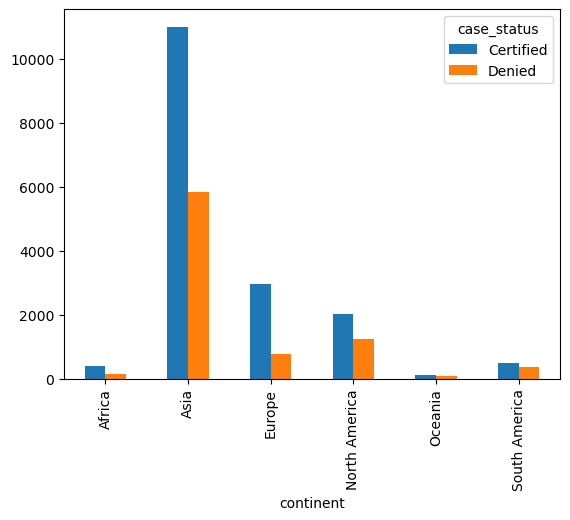

In [8]:
result1.plot(kind='bar')

In [9]:
#Continent
#Education
#Case status
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
col=[col2,col3] # values
result2=pd.crosstab(col1,col)
result2

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

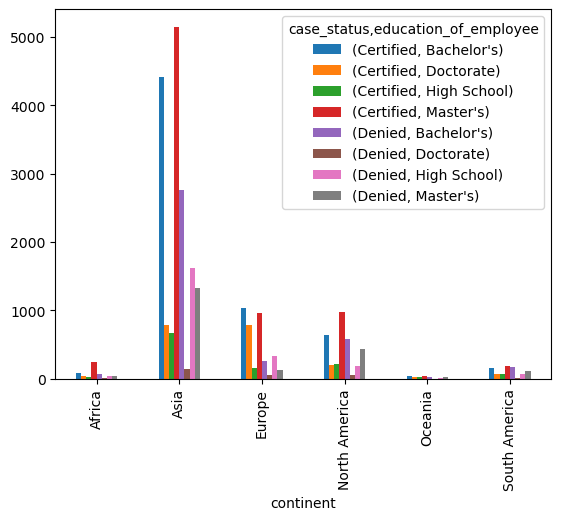

In [10]:
result2.plot(kind='bar')

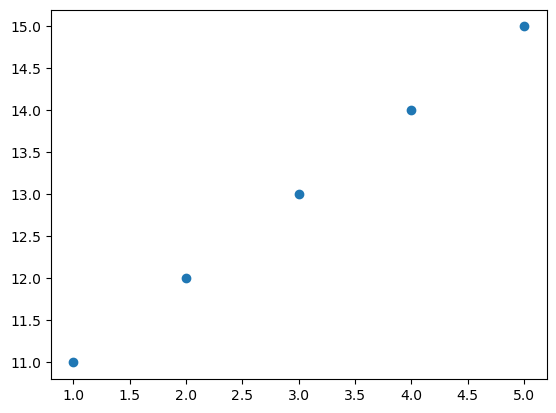

In [11]:
x=[1,2,3,4,5]
y=[11,12,13,14,15]
#(1,11),(2,12),(3,13),(4,14),(5,15)
plt.scatter(x,y)


In [12]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
x

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

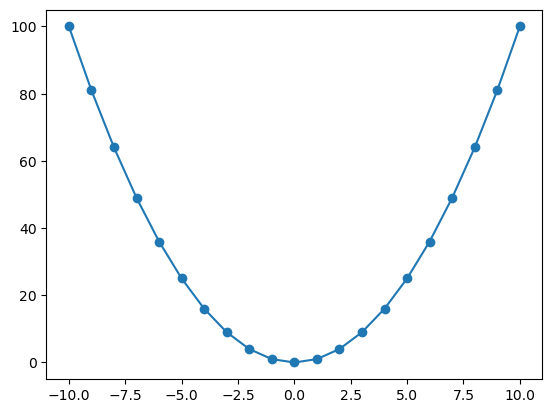

In [14]:
plt.scatter(x,y)
plt.plot(x,y)

In [15]:
dtypes=dict(visa_df.dtypes)
num=[i for i in dtypes if dtypes[i]!='O']
num

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

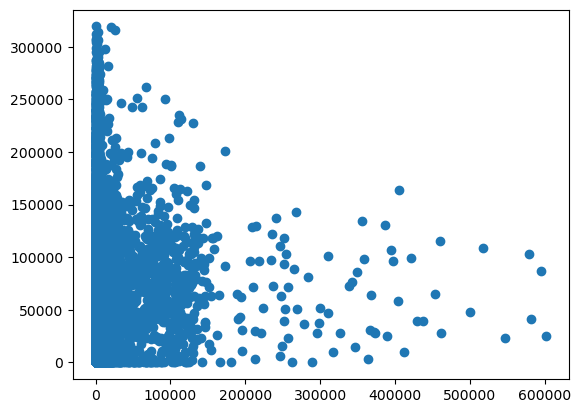

In [16]:
col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

In [17]:
#Covariance-matrix
#How many numerical variables are there : 3
# no_employee yr wage
#no_employee var cov cov
#yr cov var cov
#age cov cov var

In [18]:
visa_df.corr(numeric_only=True) # applicable for yo need to see numeric_on
# in the data frame we have both cat and numerical column
# correlation applicable for only numerical column
# Explicitly mention numeric= True
# If people has pandas old version
# they dont have numeric_only argument
# for them visa_df.corr() works

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


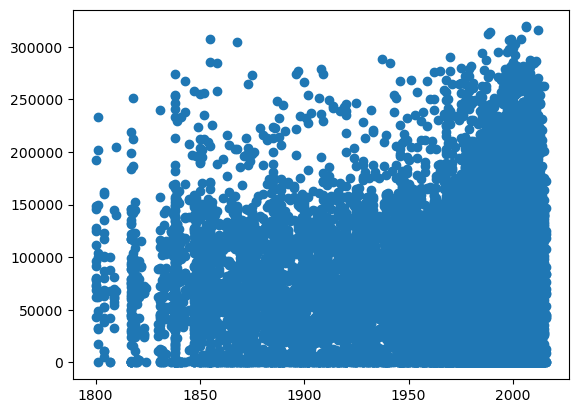

In [19]:
plt.scatter(visa_df['yr_of_estab'],visa_df['prevailing_wage'])

<Axes: >

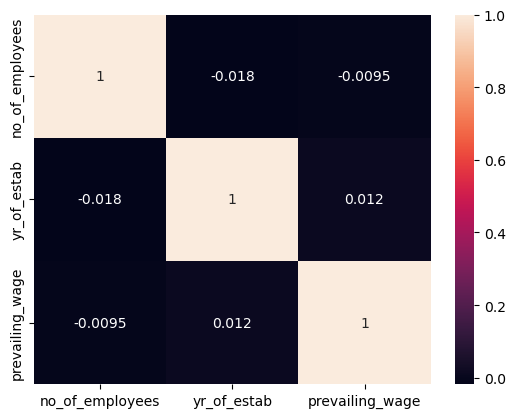

In [22]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)